In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [29]:
avg_scale_analyse = pd.read_csv('scale_analysis_results.csv', index_col=0).iloc[:4, :5].astype(float)
avg_scale_analyse

,33%,50%,66%,83%,100%
nnUNet 3D/160x128x32 (Genesis Unannotated OCT),0.602992,0.627735,0.659127,0.693077,0.743622
nnUNet 3D/160x128x32 (CLIP Pre-&Post-IVL),0.588442,0.644415,0.716145,0.654474,0.743980
nnUNet 3D/160x128x32 (LaW OCT),0.636594,0.680909,0.720197,0.682831,0.742475
nnUNet 3D/160x128x32,0.611389,0.553681,0.716012,0.644530,0.722741


In [30]:
std_scale_analyse = pd.read_csv('scale_analysis_results.csv', index_col=0).iloc[6:10, :5].astype(float)
std_scale_analyse

,33%,50%,66%,83%,100%
nnUNet 3D/160x128x32 (CLIP Pre-&Post-IVL),0.045574,0.038301,0.014678,0.022570,0.011089
nnUNet 3D/160x128x32 (LaW OCT),0.015173,0.052724,0.016676,0.029515,0.007909
nnUNet 3D/160x128x32 (Genesis Unannotated OCT),0.018366,0.044677,0.051396,0.038479,0.000210
nnUNet 3D/160x128x32,0.010205,0.147842,0.026313,0.028108,0.012554


In [31]:
avg_scale_analyse.iloc[0, :]

33%     0.602992
50%     0.627735
66%     0.659127
83%     0.693077
100%    0.743622
Name: nnUNet 3D/160x128x32 (Genesis Unannotated OCT), dtype: float64

In [32]:
std_scale_analyse.iloc[0, :].to_numpy()

array([0.04557352, 0.03830128, 0.01467766, 0.02256959, 0.01108873])

In [33]:
cmap = mpl.colormaps['twilight_shifted']

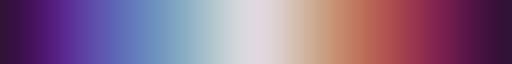

In [34]:
cmap

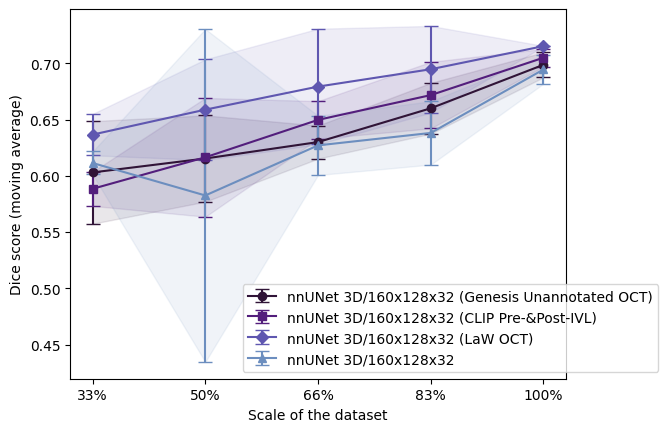

In [40]:
fig, ax = plt.subplots()

ranges = range(0, 200, 200//len(avg_scale_analyse))
colors = [cmap(i) for i in ranges]
alpha = 0.1
markers = ['o', 's', 'D', '^']
for i in range(len(avg_scale_analyse)):
    data = avg_scale_analyse.iloc[i, :]
    moving_avg = data.rolling(min_periods=1, window=3).mean()

    ax.errorbar(avg_scale_analyse.columns, moving_avg, yerr=std_scale_analyse.iloc[i, :], label=avg_scale_analyse.iloc[i, :].name, marker=markers[i], capsize=5, color=colors[i])
    ax.fill_between(avg_scale_analyse.columns, moving_avg - std_scale_analyse.iloc[i, :], moving_avg + std_scale_analyse.iloc[i, :], alpha=alpha, color=colors[i])

ax.set_xlabel('Scale of the dataset')
ax.set_ylabel('Dice score (moving average)')

ax.legend(loc='lower right', bbox_to_anchor=(1.2, 0))

fig.savefig('discussion_scale_analysis.png', dpi=1000, bbox_inches='tight')
plt.show()